# Lab 5 - Classification :  k-NN and Naive Bayes (using sklearn libraries)

## k-NN

Use **"Pima Indians Diabetes Dataset from UCI Machine Learning Repository"** for this question.It is a binary class dataset. Split the dataset into train(80%), validation(10%) and test sets(10%).

Run k-Nearest neighbours for different k values. Choose your own subset of k (atleast 10) and choose the best value of k from this subset. In solving real-world problems, the values of k are chosen based on experience and hence it is a tunable hyperparameter. Select the k, using validation set, which returns the best accuracy score. Report accuracy score by performing k-NN on the test dataset using the chosen k value. 

In [1]:
# Code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score

dataset = pd.read_csv('diabetes.csv')
features = list(dataset.columns) 
features.remove('Outcome')
target = ['Outcome']

X = dataset[features]
y = dataset[target]

rs = 2
######## Here, only train and test sets have been split since I am using cross validation
######## Below, in the for loop, I am using cross validation so that the validation is
######## accounted for.

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.1,random_state=rs)
k_list = [ 2*i + 1 for i in range(5,50) ]

X_train , X_test= np.array(X_train) , np.array(X_test)
y_train , y_test= np.array(y_train) , np.array(y_test)

accuracy_dict = {}
clf_dict = {}
for k in k_list :
    clf = KNeighborsClassifier(k)
####### Usage of balanced accuracy scores as the scoring variable helps in mitigating the 
####### class imabalance which might occur in the splitting into validation and training
    accuracy_dict[k] = cross_val_score(clf , X_train , y_train.ravel(),cv=6,scoring='balanced_accuracy').mean()    

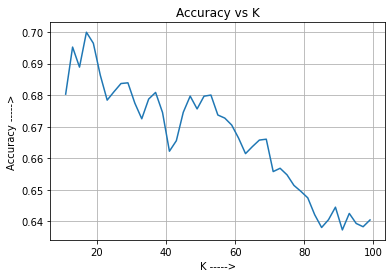

K value for Maximum Accuracy : 17


In [2]:
import matplotlib.pyplot as plt
plt.plot(k_list,[accuracy_dict[k] for k in k_list])
plt.grid()
plt.xlabel('K ----->')
plt.ylabel('Accuracy ----->')
plt.title('Accuracy vs K')
plt.show()

print('K value for Maximum Accuracy :',max(accuracy_dict,key= accuracy_dict.get))

In [3]:
from sklearn.metrics import balanced_accuracy_score
clf = KNeighborsClassifier(max(accuracy_dict,key= accuracy_dict.get))
clf.fit(X_train,y_train.ravel())

print('Accuracy for the K value with maximum Validation Accuracy :',balanced_accuracy_score(y_test.ravel(),clf.predict(X_test)))

Accuracy for the K value with maximum Validation Accuracy : 0.8069381598793364


As we can see from the above results, the value of k for which the maximum validation accuracy is achieved is 17 in this specific case. However, if we change the random seed value, then the value of k changes. It is observed that the value of k however remains around the value of 13-21 for a majority of the cases.

## Naive Bayes

Use **"Optical recognition of handwritten digits dataset"** for this question. ** Download dataset from sklearn**. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1. 

Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with the priors (Gaussian and Bernoulli) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).



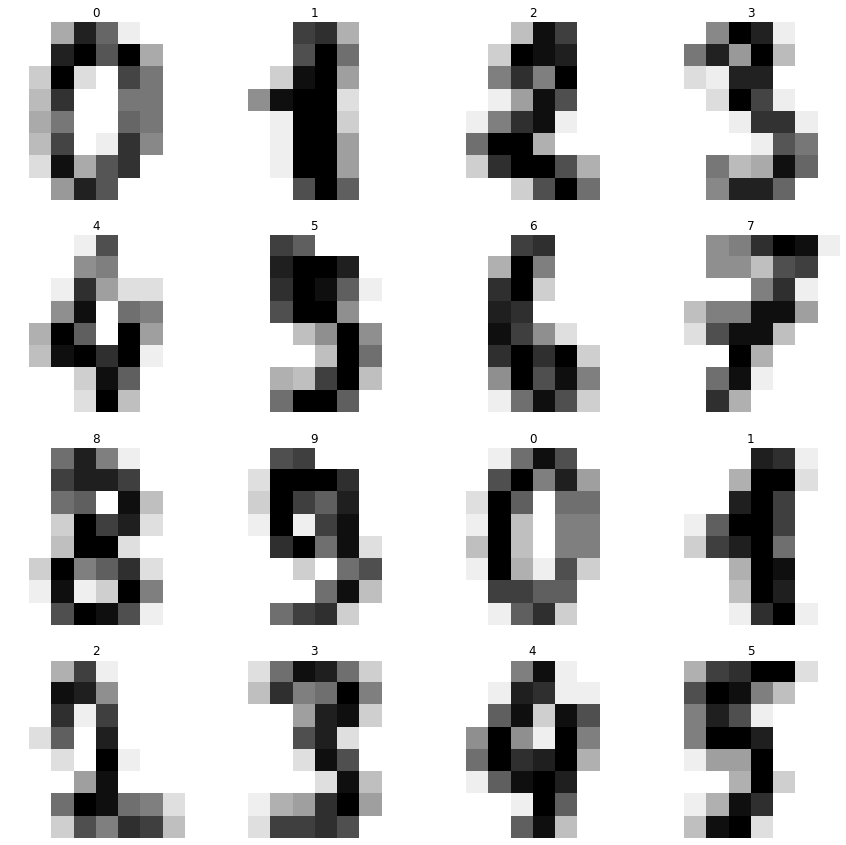

In [4]:
# Code here
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def plot_multi(i):
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

digits = datasets.load_digits()
plot_multi(0)    


X = digits.images.reshape((digits.images.shape[0],-1))
y = digits.target

In [5]:
########### Random state set to 42
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

Gaussian Naive Bayes F1 score : 0.8472222222222222


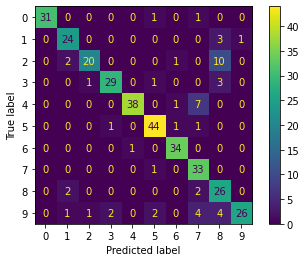

In [6]:
model = GaussianNB()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test,y_pred,average ='micro')
conf = confusion_matrix(y_test , y_pred)

print('Gaussian Naive Bayes F1 score :',f1)
plot_confusion_matrix(model, X_test, y_test)
plt.show()

Bernoulli Naive Bayes F1 score : 0.8638888888888889


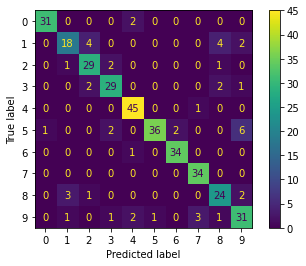

In [7]:
model = BernoulliNB()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test,y_pred,average ='micro')
conf = confusion_matrix(y_test , y_pred)
print('Bernoulli Naive Bayes F1 score :',f1)
plot_confusion_matrix(model, X_test, y_test)
plt.show()

We can see that for this specific Random State = 42, the Bernoulli prior Naive bayes has a higher f-score compared to Gaussian Naive Baye's. 

From the confusion matrices, one evident observation there are a specific set of numbers which are being predicted worng more often. For intance, digit '2' is being predicted as digit '8' considerable number of times in Gaussian Naive Baye's.